In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

In [2]:
df = pd.read_csv('df_combined')

In [3]:
pd.set_option("max_rows", 36206)

In [4]:
df.shape

(35117, 2)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

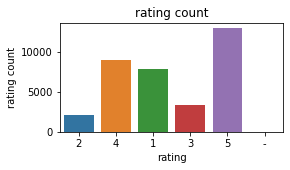

5    12898
4     8915
1     7784
3     3377
2     2135
-        7
Name: Ratings, dtype: int64


In [7]:
plt.subplots(figsize=(4,2))
sns.countplot(x='Ratings',data=df)
plt.title('rating count')
plt.xlabel('rating')
plt.ylabel('rating count')
plt.show()

print(df['Ratings'].value_counts())

In [8]:
df.isnull().sum()

Reviews    2
Ratings    1
dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  35115 non-null  object
 1   Ratings  35116 non-null  object
dtypes: object(2)
memory usage: 548.8+ KB


In [10]:

df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [11]:
df.shape

(35114, 2)

In [12]:
#New column for Length of reviews
df["length_review"] = df["Reviews"].apply(len)
df.sort_values(by='length_review', ascending=False).head(15)

Reviews Ratings  \
15854  Wearables and its penetration in our market ha...       5   
17242  Wearables and its penetration in our market ha...       5   
20541  My employer got installed "Legrand Numeric UPS...       4   
15746  NOTE :\n@ It does NOT have a mic & speaker, so...       3   
10809  I wanted to buy a laptop and my main purpose w...       5   
15478  NOTE :\n@ Turn OFF the Bixby Voice wake up & C...       5   
14880  I first owned a Bose QC35, however, I felt Bos...       1   
11702  Got the Note 9 Pro in Galcier White Colour on ...       4   
18478  Canon 6D Mark II is the most anticipated camer...       5   
20088  Canon 6D Mark II is the most anticipated camer...       5   
18780  Canon 6D Mark II is the most anticipated camer...       5   
21773  To sum up my collective experience of 2 days i...       5   
20982  I was looking for a value for money radio with...       3   
9710   In-depth review and research..\n\nI am a lapto...       5   
10079  This is an average speced laptop for the price...       4   

       length_review  
15854          19938  
17242          19938  
20541          10303  
15746           9300  
10809           9200  
15478           8006  
14880           7561  
11702           7553  
18478           6926  
20088           6926  
18780           6926  
21773           6623  
20982           5876  
9710            4992  
10079           4974

In [13]:
i=df[df.length_review==1].index

In [14]:
df=df.drop(i)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

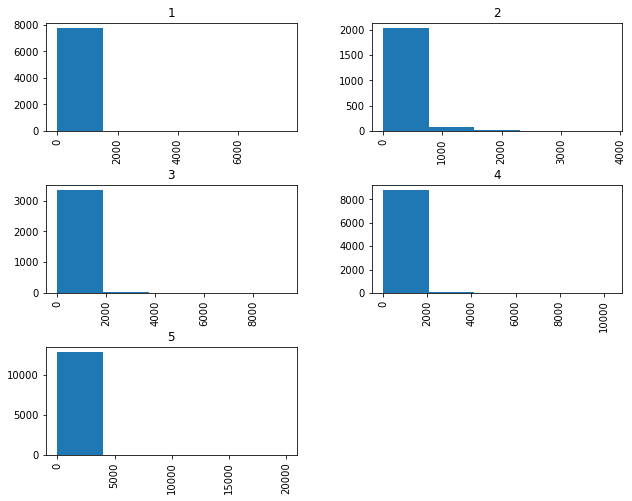

In [15]:
df.hist(column = 'length_review', by ='Ratings',figsize=(10,8), bins = 5)

In [16]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [17]:
def cleaning_data(row):
    #taking only words and removing number and special chars using RegX
    row=row.lower()
    row=re.sub('[^a-zA-Z]',' ',row)
    #tokenize the data
    tokens = word_tokenize(row)
    #lemmatize rhe word and remove stop words
    data = [lemma.lemmatize(word,pos="v") for word in tokens if not word in stop_words]
    #finally join all the token with space 
    cleaned_data=' '.join(data)
    
    return cleaned_data

In [18]:
df['Reviews']=df['Reviews'].apply(cleaning_data)
df['Reviews'][:50]

0     exist router range better device device range ...
1     good product range way better earlier get litt...
2     useful device ghz always wifi range second roo...
3     write review use weeks buy router replace jiof...
4     see mix review buy product well acquaint techn...
5     right days router stop work power lead flash n...
6     ghz range low ghz range expect low work really...
7                               yes good thank flipcard
8                             waste product connect buy
9                    good performance high speed router
10    tp link archer c router days see issue speed g...
11    rat work properly bhk flat around sqft router ...
12    nothing extraordinary though task previous rou...
13    experience order retailnet seller order delive...
14                                         awsm product
15                                         good product
16                                     worst experience
17                     good ok capacity connect 

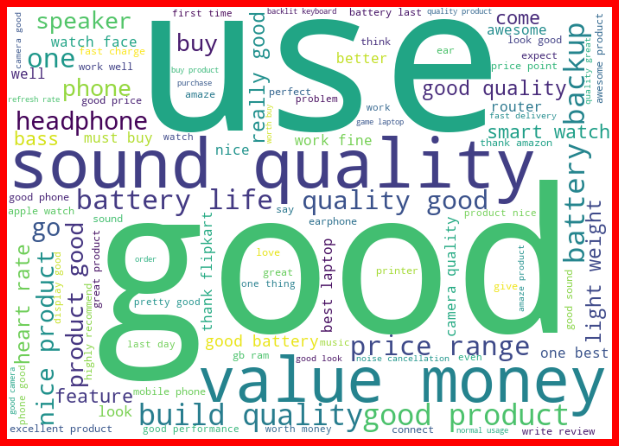

In [19]:
#Getting sense of loud words in highest rating

highest = df['Reviews'][df['Ratings']=='5']

highest_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(highest))

plt.figure(figsize=(10,6),facecolor='r')
plt.imshow(highest_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

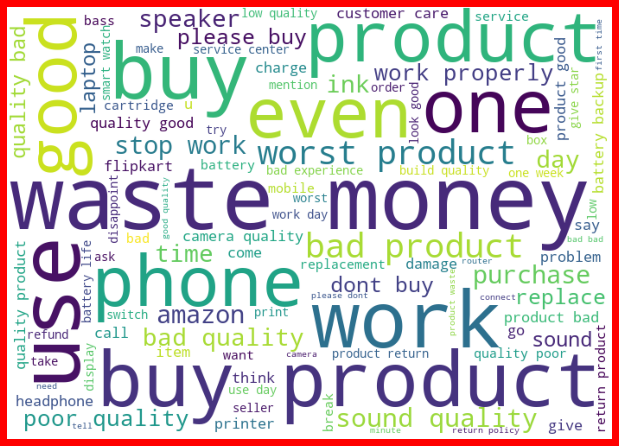

In [20]:
#Getting sense of loud words in least rating

least = df['Reviews'][df['Ratings']=='1']

least_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(least))

plt.figure(figsize=(10,6),facecolor='r')
plt.imshow(least_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
from nltk import ngrams
def word_frequency(row):
    tokens = word_tokenize(row)
    counted = Counter(tokens)
    counted_2= Counter(ngrams(tokens,2))
    counted_3= Counter(ngrams(tokens,3))
    word_freq= pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False) 
    
    return word_freq ,word_pairs, trigrams

In [22]:
from collections import Counter
for i in df['Reviews'][df['Ratings']=='5'][:100]:
    print(word_frequency(i))

(           word  frequency
6        really          2
0          nice          1
12         well          1
20        quite          1
19        sound          1
18      quality          1
17      display          1
16        style          1
15      include          1
14  impressions          1
13      initial          1
11        board          1
1       product          1
10      capture          1
9         class          1
8        online          1
7       helpful          1
5     processor          1
4        decent          1
3        screen          1
2         large          1
21   impressive          1,                      pairs  frequency
0          (nice, product)          1
1         (product, large)          1
20          (sound, quite)          1
19        (quality, sound)          1
18      (display, quality)          1
17        (style, display)          1
16        (include, style)          1
15  (impressions, include)          1
14  (initial, impressions)         

In [23]:
for i in df['Reviews'][df['Ratings']=='1'][:100]:
    print(word_frequency(i))

(         word  frequency
4        work          2
11        try          2
0       right          1
15    nothing          1
25      money          1
24   complete          1
23       call          1
22       pick          1
21        one          1
20       luck          1
19       team          1
18    support          1
17  technical          1
16      reach          1
13      reset          1
14     device          1
1        days          1
12     reboot          1
10       come          1
9        leds          1
8         non          1
7       flash          1
6        lead          1
5       power          1
3        stop          1
2      router          1
26      waste          1,                    pairs  frequency
0          (right, days)          1
1         (days, router)          1
26     (complete, money)          1
25      (call, complete)          1
24          (pick, call)          1
23           (one, pick)          1
22           (luck, one)          1
21        

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
x = df['Reviews']
y = df['Ratings'].astype(str).astype(int)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True,stratify=y)

In [27]:
vectorizer=CountVectorizer()
vectorizer.fit(x_train)
X_train=vectorizer.transform(x_train)
X_test=vectorizer.transform(x_test)

In [28]:
print(X_train.shape,X_test.shape)

(28068, 13098) (7018, 13098)


In [29]:
X_train = X_train.toarray()

In [30]:
X_test = X_test.toarray()

In [31]:
y_test.value_counts()

5    2578
4    1781
1    1557
3     675
2     427
Name: Ratings, dtype: int64

In [32]:
y_train.value_counts()

5    10310
4     7125
1     6227
3     2701
2     1705
Name: Ratings, dtype: int64

Class=5, n=10310 (20.000%)
Class=3, n=10310 (20.000%)
Class=4, n=10310 (20.000%)
Class=1, n=10310 (20.000%)
Class=2, n=10310 (20.000%)


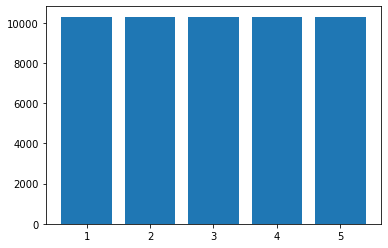

In [33]:
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [35]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                130990    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
Total params: 131,056
Trainable params: 131,056
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
from keras.backend import clear_session
clear_session()

In [38]:
history=model.fit(X_train,y_train,
                     batch_size=64,
                     epochs=20,
                     validation_data=(X_test,y_test)
                     )

Epoch 1/20
806/806 [==============================] - 196s 203ms/step - loss: 1.4289 - accuracy: 0.4634 - val_loss: 0.9354 - val_accuracy: 0.6267
Epoch 2/20
806/806 [==============================] - 132s 165ms/step - loss: 0.8928 - accuracy: 0.6428 - val_loss: 0.8615 - val_accuracy: 0.6646
Epoch 3/20
806/806 [==============================] - 155s 193ms/step - loss: 0.7843 - accuracy: 0.6843 - val_loss: 0.8307 - val_accuracy: 0.6825
Epoch 4/20
806/806 [==============================] - 115s 143ms/step - loss: 0.7309 - accuracy: 0.7060 - val_loss: 0.8413 - val_accuracy: 0.6791
Epoch 5/20
806/806 [==============================] - 103s 127ms/step - loss: 0.6891 - accuracy: 0.7177 - val_loss: 0.8482 - val_accuracy: 0.6918
Epoch 6/20
806/806 [==============================] - 101s 125ms/step - loss: 0.6537 - accuracy: 0.7324 - val_loss: 0.8690 - val_accuracy: 0.6887
Epoch 7/20
806/806 [==============================] - 97s 120ms/step - loss: 0.6357 - accuracy: 0.7377 - val_loss: 0.8908 - 

In [39]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7808
Testing Accuracy:  0.6976


In [40]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

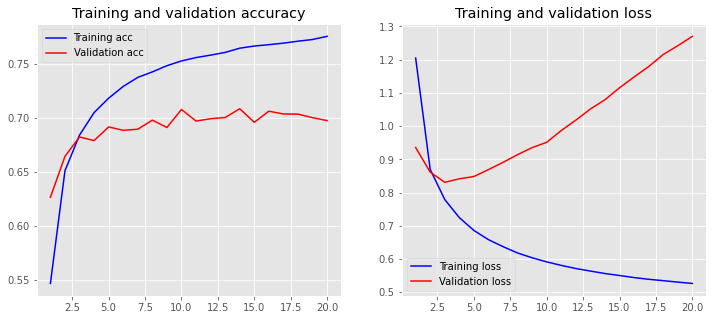

In [41]:
plot_history(history)

In [42]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [46]:
from xgboost import XGBClassifier

In [47]:
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=50)
clf=XGBClassifier(n_jobs=-1,n_estimators=50)

list=[rfc,clf]
for m in list:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print('Accuracy of {} is {}'. format(m,round(score*100,2)))
    print(confusion_matrix(y_test,y_pred, labels=[0,1]))
    print(classification_report(y_test,y_pred))
    print('\n')

Accuracy of RandomForestClassifier(n_estimators=50, n_jobs=-1) is 72.3
[[   0    0]
 [   0 1188]]
              precision    recall  f1-score   support

           1       0.85      0.76      0.80      1557
           2       0.46      0.64      0.53       427
           3       0.40      0.68      0.50       675
           4       0.75      0.69      0.72      1781
           5       0.87      0.75      0.80      2578

    accuracy                           0.72      7018
   macro avg       0.66      0.70      0.67      7018
weighted avg       0.76      0.72      0.74      7018



[07:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsa

In [3]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=50)
import joblib
file='RF.pkl'
joblib.dump(rfc,file)

['RF.pkl']